In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd


In [2]:
ff1.Cache.enable_cache('../cache')


In [3]:
YEAR = 2023
RACE = 'Bahrain'
SESSION = 'Q'

session = ff1.get_session(
    YEAR, RACE, SESSION
)


events        ERROR 	Failed to access primary schedule backend. Falling back to Ergast! Reason: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)))


In [4]:
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with

In [17]:
MAX, ALONSO, CHARLES = 'VER', 'ALO', 'LEC'


In [18]:
laps = session.laps


In [21]:
maxLaps = laps.pick_driver(MAX)
alonsoLaps = laps.pick_driver(ALONSO)
charlesLaps = laps.pick_driver(CHARLES)

maxFastest = maxLaps.pick_fastest()
alonsoFastest = alonsoLaps.pick_fastest()
charlesFastest = charlesLaps.pick_fastest()

maxCarData = maxFastest.get_car_data()
alonsoCarData = alonsoFastest.get_car_data()
charlesCarData = charlesFastest.get_car_data()

maxTelemetry = maxFastest.get_telemetry()
alonsoTelemetry = alonsoFastest.get_telemetry()
charlesTelemetry = charlesFastest.get_telemetry()


C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

In [22]:
maxVSAlonso_delta, maxVSAlonso_ref, maxVSAlonso_compare = utils.delta_time(maxFastest, alonsoFastest)
maxVSCharles_delta, maxVSCharles_ref, maxVSCharles_compare = utils.delta_time(maxFastest, charlesFastest)

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace i

In [23]:
MaxDvr = maxFastest['Team']
AlonsoDvr = alonsoFastest['Team']
CharlesDvr = charlesFastest['Team']


In [34]:
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} - {session.name}"
plot_ratios = [2, 2, 3, 3, 3, 3, 3, 3]
plot_filename = plot_title.replace(" ", "") + ".png"


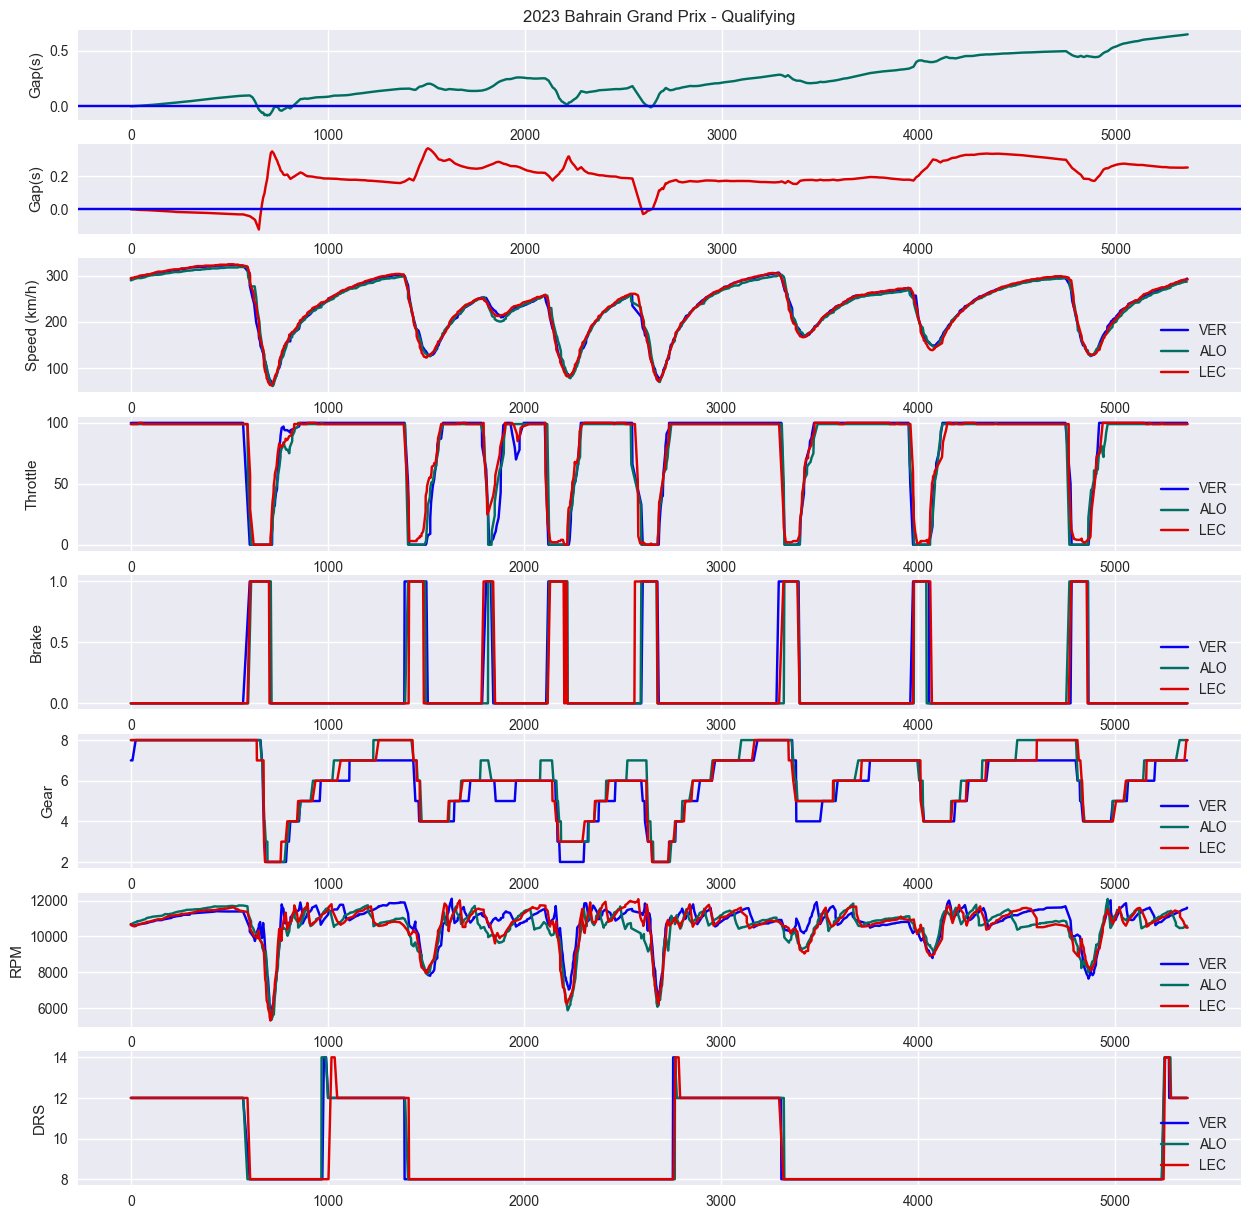

In [92]:
plt.rcParams['figure.figsize'] = plot_size

fig, ax = plt.subplots(8, 1, gridspec_kw={'height_ratios': plot_ratios})

ax[0].title.set_text(plot_title)

ax[0].plot(maxVSAlonso_ref['Distance'], maxVSAlonso_delta,
           color=ff1.plotting.team_color(AlonsoDvr))
ax[0].axhline(0)
ax[0].set(ylabel=f'Gap(s)')

ax[1].plot(maxVSCharles_ref['Distance'], maxVSCharles_delta,
           color=ff1.plotting.team_color(CharlesDvr))
ax[1].axhline(0)
ax[1].set(ylabel=f'Gap(s)')

ax[2].plot(maxTelemetry['Distance'], maxTelemetry['Speed'],
           label=MAX, color=ff1.plotting.team_color(MaxDvr))
ax[2].plot(alonsoTelemetry['Distance'], alonsoTelemetry['Speed'],
           label=ALONSO, color=ff1.plotting.team_color(AlonsoDvr))
ax[2].plot(charlesTelemetry['Distance'], charlesTelemetry['Speed'],
           label=CHARLES, color=ff1.plotting.team_color(CharlesDvr))
ax[2].set(ylabel='Speed (km/h)')
ax[2].legend(loc='lower right')

ax[3].plot(maxTelemetry['Distance'], maxTelemetry['Throttle'],
           label=MAX, color=ff1.plotting.team_color(MaxDvr))
ax[3].plot(alonsoTelemetry['Distance'], alonsoTelemetry['Throttle'],
           label=ALONSO, color=ff1.plotting.team_color(AlonsoDvr))
ax[3].plot(charlesTelemetry['Distance'], charlesTelemetry['Throttle'],
           label=CHARLES, color=ff1.plotting.team_color(CharlesDvr))
ax[3].set(ylabel='Throttle')
ax[3].legend(loc='lower right')

ax[4].plot(maxTelemetry['Distance'], maxTelemetry['Brake'],
           label=MAX, color=ff1.plotting.team_color(MaxDvr))
ax[4].plot(alonsoTelemetry['Distance'], alonsoTelemetry['Brake'],
           label=ALONSO, color=ff1.plotting.team_color(AlonsoDvr))
ax[4].plot(charlesTelemetry['Distance'], charlesTelemetry['Brake'],
           label=CHARLES, color=ff1.plotting.team_color(CharlesDvr))
ax[4].set(ylabel='Brake')
ax[4].legend(loc='lower right')

ax[5].plot(maxTelemetry['Distance'], maxTelemetry['nGear'],
           label=MAX, color=ff1.plotting.team_color(MaxDvr))
ax[5].plot(alonsoTelemetry['Distance'], alonsoTelemetry['nGear'],
           label=ALONSO, color=ff1.plotting.team_color(AlonsoDvr))
ax[5].plot(charlesTelemetry['Distance'], charlesTelemetry['nGear'],
           label=CHARLES, color=ff1.plotting.team_color(CharlesDvr))
ax[5].set(ylabel='Gear')
ax[5].legend(loc='lower right')

ax[6].plot(maxTelemetry['Distance'], maxTelemetry['RPM'],
           label=MAX, color=ff1.plotting.team_color(MaxDvr))
ax[6].plot(alonsoTelemetry['Distance'], alonsoTelemetry['RPM'],
           label=ALONSO, color=ff1.plotting.team_color(AlonsoDvr))
ax[6].plot(charlesTelemetry['Distance'], charlesTelemetry['RPM'],
           label=CHARLES, color=ff1.plotting.team_color(CharlesDvr))
ax[6].set(ylabel='RPM')
ax[6].legend(loc='lower right')

ax[7].plot(maxTelemetry['Distance'], maxTelemetry['DRS'],
           label=MAX, color=ff1.plotting.team_color(MaxDvr))
ax[7].plot(alonsoTelemetry['Distance'], alonsoTelemetry['DRS'],
           label=ALONSO, color=ff1.plotting.team_color(AlonsoDvr))
ax[7].plot(charlesTelemetry['Distance'], charlesTelemetry['DRS'],
           label=CHARLES, color=ff1.plotting.team_color(CharlesDvr))
ax[7].set(ylabel='DRS')
ax[7].legend(loc='lower right')


In [55]:
new_laps = session.load_laps()

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1492: FutureWarning: it

In [56]:
new_laps['LapTimeSeconds'] = new_laps['LapTime'].dt.total_seconds()


In [57]:
new_laps = new_laps.loc[(new_laps['PitOutTime'].isnull()
                         & new_laps['PitInTime'].isnull())]


In [62]:
import seaborn as sns


In [71]:
# display the attribute name of all the rows
for col in new_laps.columns:
    print(col)


Time
DriverNumber
LapTime
LapNumber
PitOutTime
PitInTime
Sector1Time
Sector2Time
Sector3Time
Sector1SessionTime
Sector2SessionTime
Sector3SessionTime
SpeedI1
SpeedI2
SpeedFL
SpeedST
IsPersonalBest
Compound
TyreLife
FreshTyre
Stint
LapStartTime
Team
Driver
TrackStatus
IsAccurate
LapTimeSeconds


In [75]:
# Extract LapTimeSeconds data
lap_times = new_laps['LapTimeSeconds']

# Calculate IQR
Q1 = np.percentile(lap_times, 25)
Q3 = np.percentile(lap_times, 75)
IQR = Q3 - Q1

# Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = lap_times[(lap_times < lower_bound) | (lap_times > upper_bound)]
new_laps = new_laps[~new_laps['LapTimeSeconds'].isin(outliers)]


In [87]:
laps_data = new_laps[['LapTimeSeconds', 'Team']].copy()


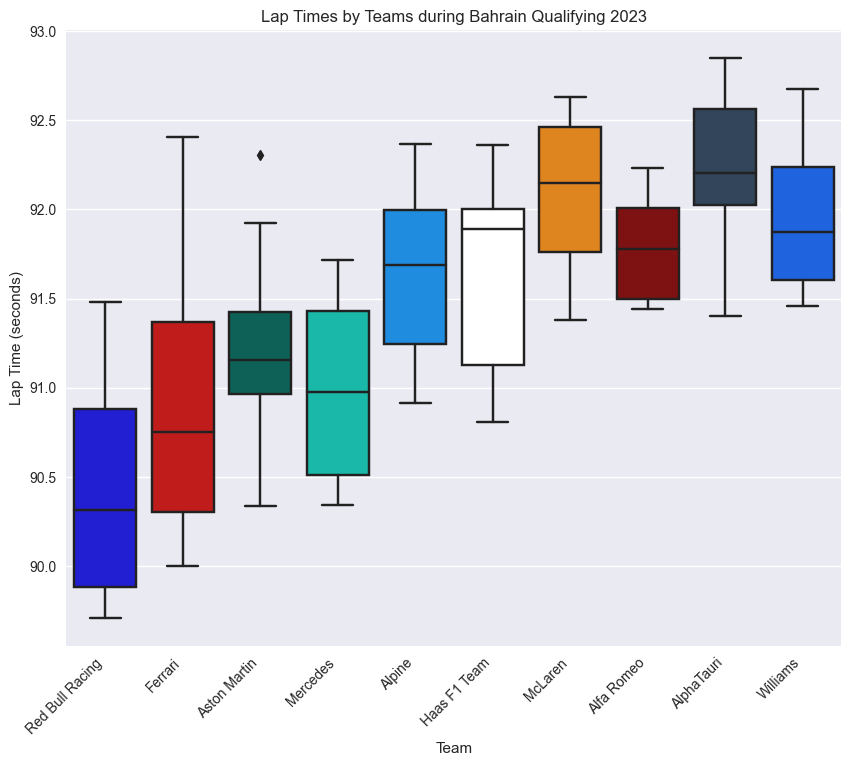

In [91]:
plt.figure(figsize=(10, 8))
colors = ['#0600EF', '#DC0000', '#006F62', '#00D2BE', '#0090FF', '#FFFFFF', '#FF8700', '#900000', '#2B4562', '#005AFF']
sns.boxplot(x='Team', y='LapTimeSeconds', data=laps_data,palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Lap Times by Teams during Bahrain Qualifying 2023')
plt.ylabel('Lap Time (seconds)')

plt.show()